In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/building_inventory.csv",
                na_values = {'Year Acquired': 0,
                             'Year Constructed': 0,
                             'Square Footage': 0})

In [3]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8597.000000,8573.000000,8.805000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1972.243573,1970.391928,1.155032e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,27.549380,29.326256,3.828480e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,1753.000000,1753.000000,9.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1959.000000,1957.000000,2.400000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1975.000000,1.664000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.528000e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [4]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [5]:
df.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

In [6]:
df.groupby("Year Acquired")["Square Footage"].describe()

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [7]:
stats = df.groupby("Year Acquired")["Square Footage"].describe()

In [8]:
stats.iloc[0]

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: 1753.0, dtype: float64

In [9]:
stats.loc[1753]

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: 1753.0, dtype: float64

In [10]:
stats.iloc[0:1]

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.0,NaN,1200.0,1200.0,1200.0,1200.0,1200.0


In [11]:
stats.loc[1753:1802]

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.0,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
1802.0,2.0,2220.0,1943.129435,846.0,1533.0,2220.0,2907.0,3594.0


Text(0, 0.5, 'Square Footage')

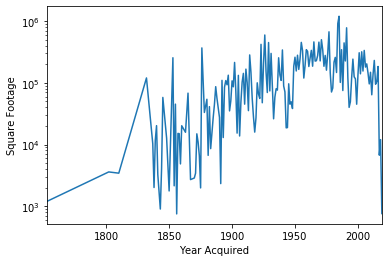

In [12]:
p = stats["max"].plot()
p.set_yscale("log")
p.set_ylabel("Square Footage")

In [13]:
plt.rcParams["figure.dpi"] = 150

Text(0, 0.5, 'Square Footage')

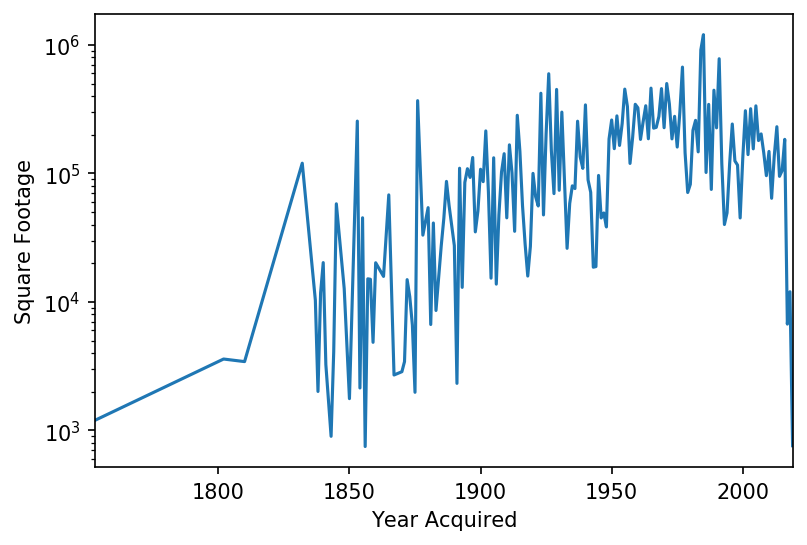

In [14]:
p = stats["max"].plot()
p.set_yscale("log")
p.set_ylabel("Square Footage")

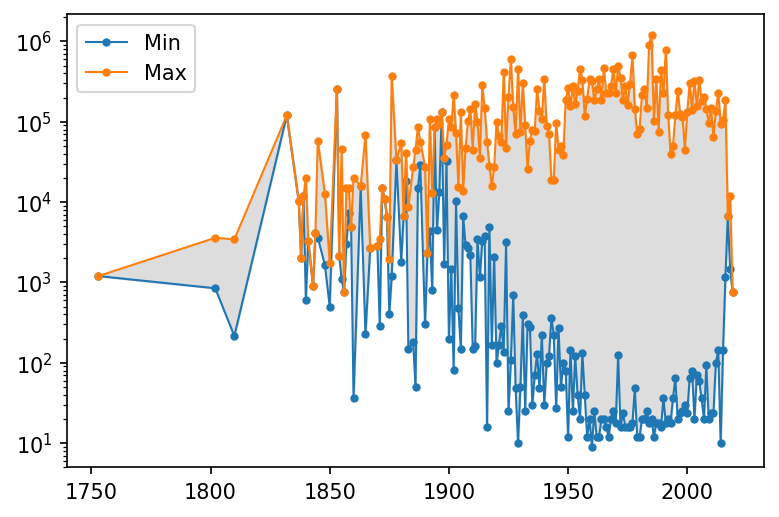

In [15]:
plt.plot(stats["min"], marker='.', linewidth=1.0, label="Min")
plt.plot(stats["max"], marker='.', linewidth=1.0, label="Max")
plt.fill_between(stats.index, stats["min"], stats["max"], color="#dddddd")
plt.yscale("log")
plt.legend()

In [16]:
plt.style.available

['seaborn-white',
 'seaborn-whitegrid',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-deep',
 '_classic_test',
 'ggplot',
 'seaborn',
 'tableau-colorblind10',
 'dark_background',
 'Solarize_Light2',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-ticks',
 'seaborn-talk',
 'grayscale',
 'seaborn-notebook',
 'seaborn-bright',
 'bmh',
 'seaborn-muted',
 'classic',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fast']

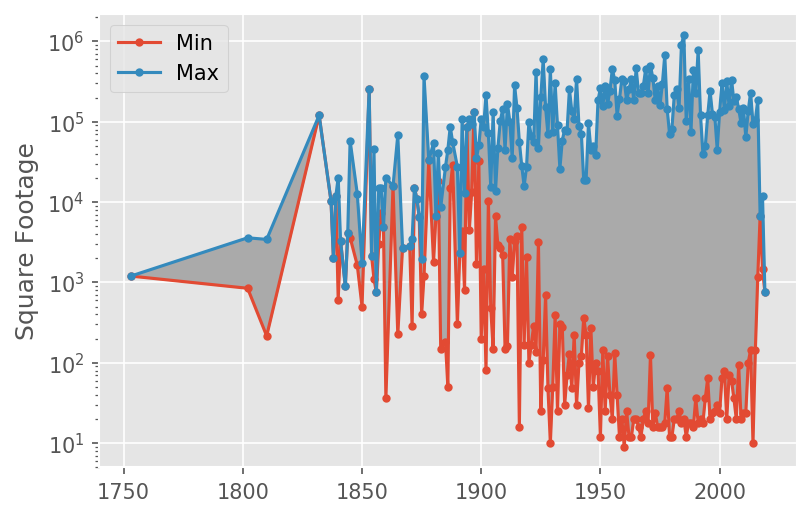

In [17]:
with plt.style.context("ggplot"):
    plt.plot(stats["min"], marker='.', label="Min")
    plt.plot(stats["max"], marker='.', label="Max")
    plt.fill_between(stats.index, stats["min"], stats["max"], color = "#aaaaaa")
    plt.ylabel("Square Footage")
    plt.yscale("log")
    plt.legend()

In [18]:
import matplotlib.transforms as mpt

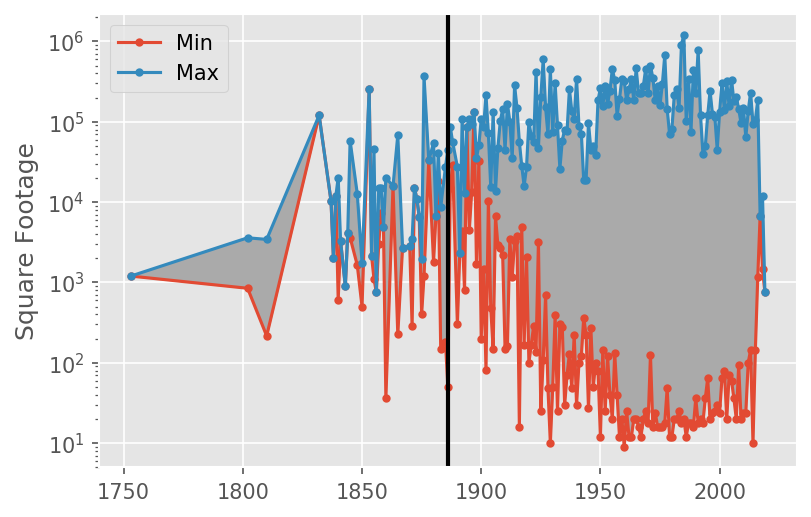

In [19]:
with plt.style.context("ggplot"):
    plt.plot(stats["min"], marker='.', label="Min")
    plt.plot(stats["max"], marker='.', label="Max")
    plt.fill_between(stats.index, stats["min"], stats["max"], color = "#aaaaaa")
    
    plt.ylabel("Square Footage")
    plt.yscale("log")
    plt.legend()
    
    ax = plt.gca()
    plt.plot([0.5, 0.5], [0.0, 1.0], color = 'black', linewidth=2.0,
             transform = ax.transAxes)

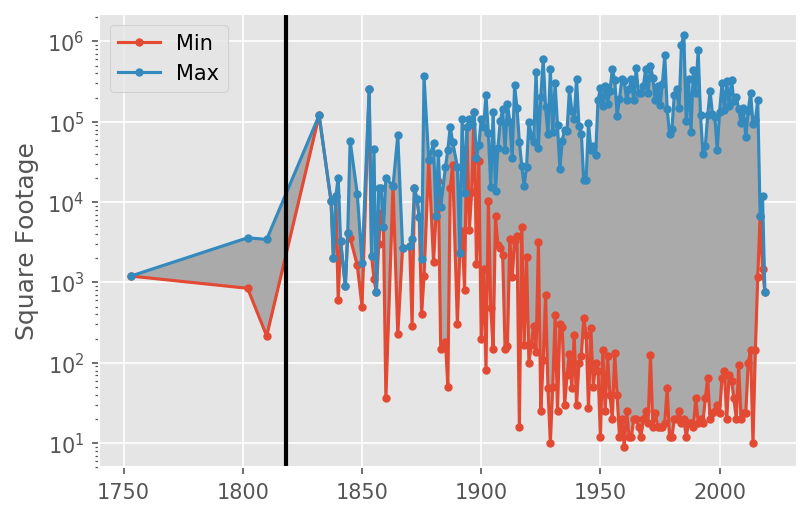

In [20]:
with plt.style.context("ggplot"):
    plt.plot(stats["min"], marker='.', label="Min")
    plt.plot(stats["max"], marker='.', label="Max")
    plt.fill_between(stats.index, stats["min"], stats["max"], color = "#aaaaaa")
    
    plt.ylabel("Square Footage")
    plt.yscale("log")
    plt.legend()
    
    ax = plt.gca()
    new_transform = mpt.blended_transform_factory(ax.transData, ax.transAxes)
    plt.plot([1818, 1818], [0.0, 1.0], color = 'black', linewidth=2.0,
             transform = new_transform)

In [21]:
import ipywidgets

In [22]:
slider = ipywidgets.IntSlider(10)

In [23]:
slider

IntSlider(value=10)

In [24]:
slider

IntSlider(value=10)

In [25]:
slider.value

10

In [26]:
slider.min, slider.max

(0, 100)

In [27]:
slider.min = 50

In [28]:
ipywidgets.IntSlider(10, min = 9, max=11)

IntSlider(value=10, max=11, min=9)

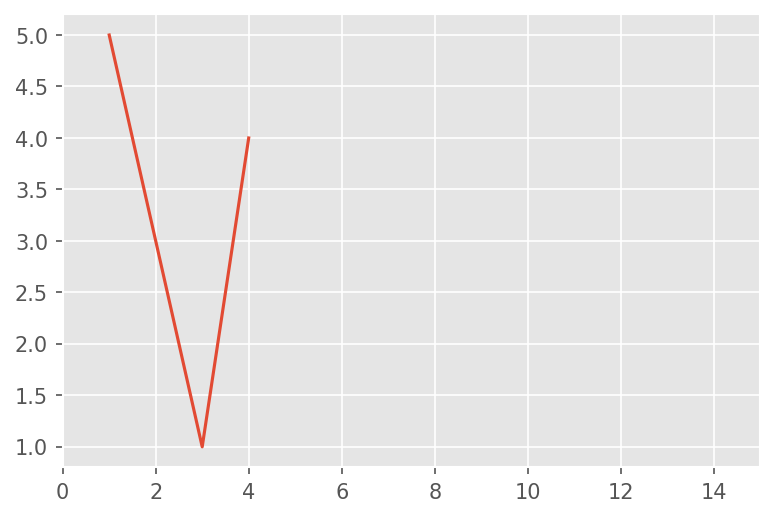

In [29]:
@ipywidgets.interact(style = plt.style.available, min_x = (0.0, 10.0, 0.1))
def make_plot(style = "ggplot", min_x = 0.0):
    with plt.style.context(style):
        plt.plot([1,2,3,4], [5,3,1,4])
        plt.xlim(min_x, 15.0)

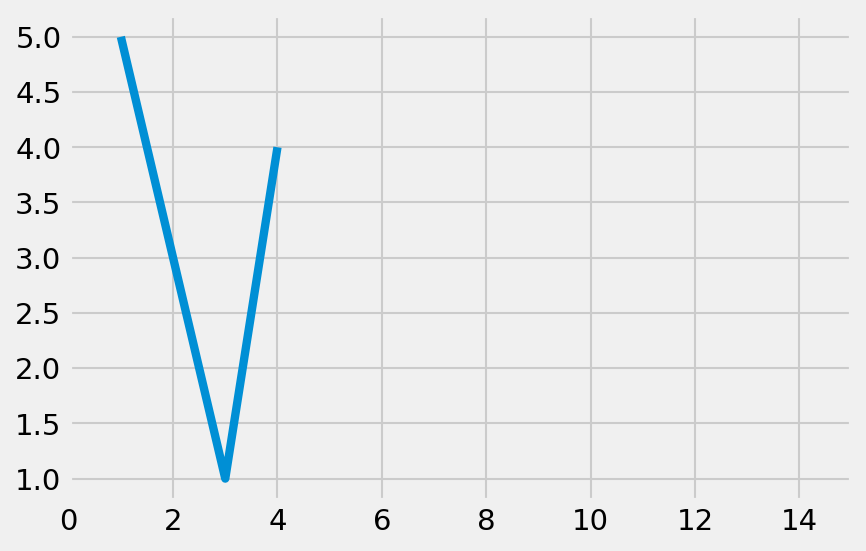

In [30]:
make_plot("fivethirtyeight")

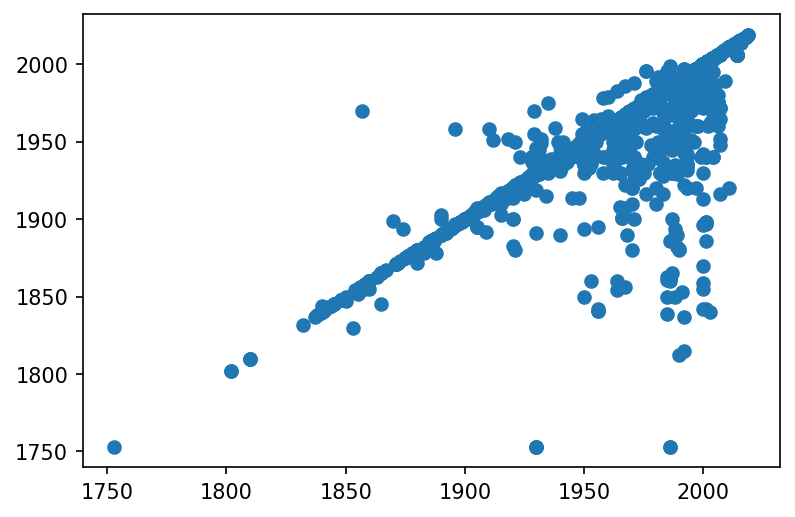

In [31]:
plt.scatter("Year Acquired", "Year Constructed", data = df)

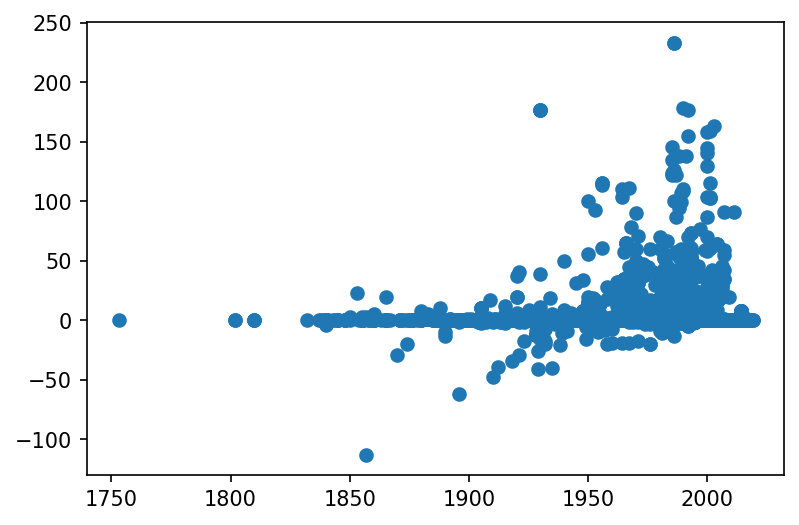

In [32]:
plt.scatter(df["Year Acquired"], df["Year Acquired"] - df["Year Constructed"])

In [37]:
df["Delta Time"] = df["Year Acquired"] - df["Year Constructed"]
df["Delta Time"].replace(0, np.nan, inplace=True)

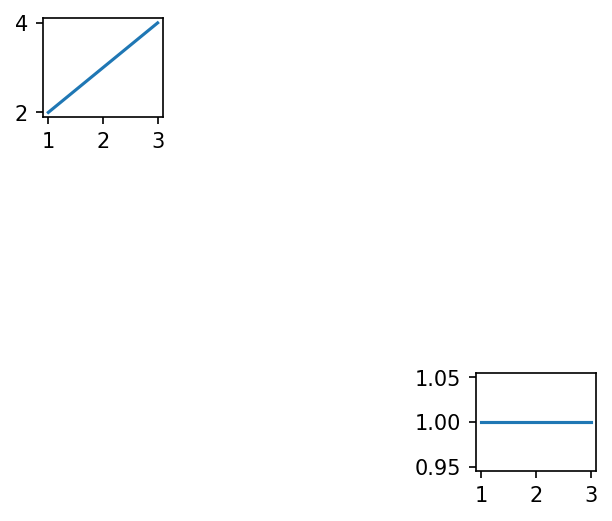

In [42]:
plt.subplot(4, 5, 1)
plt.plot([1,2,3], [2,3,4])
plt.subplot(4, 5, 19)
plt.plot([1,2,3], [1,1,1])

In [43]:
michigan = np.fromfile("michigan_lld/michigan_lld.flt", dtype="f4").reshape((5365, 4201))

In [44]:
michigan.shape

(5365, 4201)

In [45]:
michigan.max()

351.94348

In [46]:
michigan.min()

-9999.0

In [47]:
michigan[michigan == -9999] = np.nan

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.305380e+05, 9.692900e+05, 2.736477e+06, 3.288539e+06,
        4.979745e+06, 5.412426e+06, 2.916778e+06, 1.280268e+06,
        2.349550e+05, 3.681000e+03]),
 array([-275.89    , -213.10666 , -150.32332 ,  -87.53996 ,  -24.756617,
          38.026733,  100.81008 ,  163.59343 ,  226.37679 ,  289.16013 ,
         351.94348 ], dtype=float32),
 <a list of 10 Patch objects>)

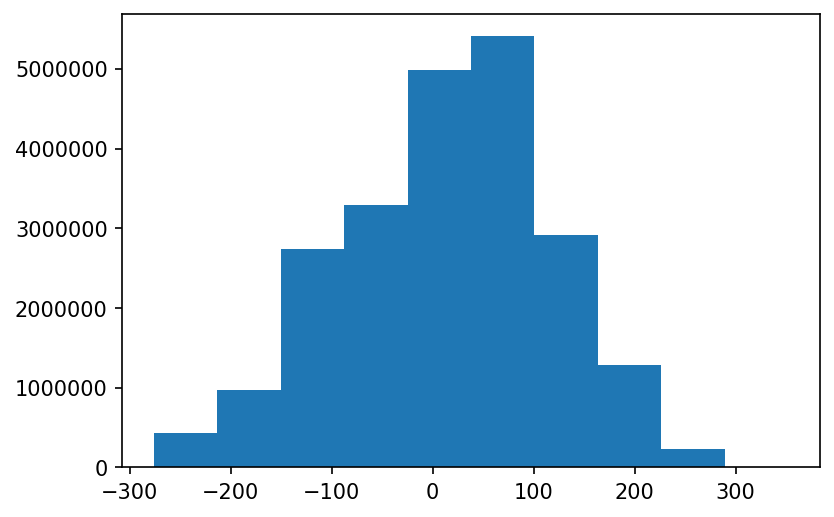

In [48]:
plt.hist(michigan.flat)

In [49]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

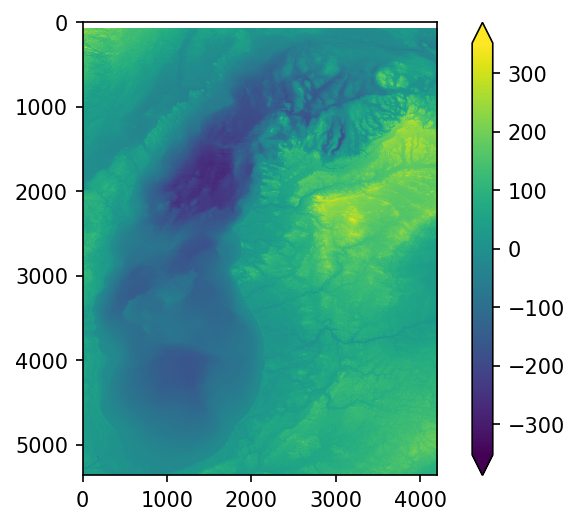

In [54]:
plt.imshow(michigan)
plt.colorbar(extend = 'both')
plt.clim(-352, 352)

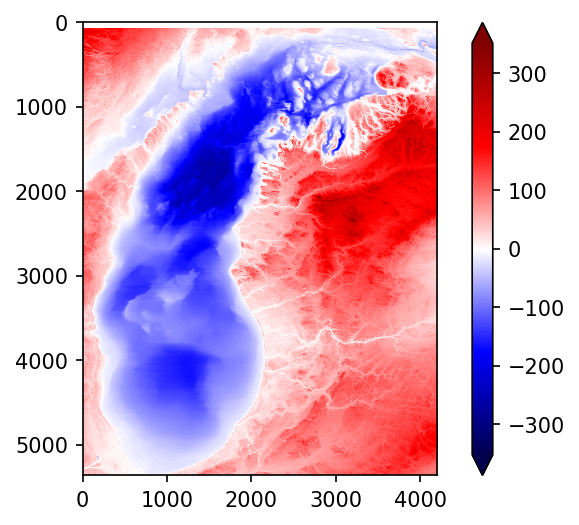

In [55]:
plt.imshow(michigan, cmap="seismic")
plt.colorbar(extend = 'both')
plt.clim(-352, 352)

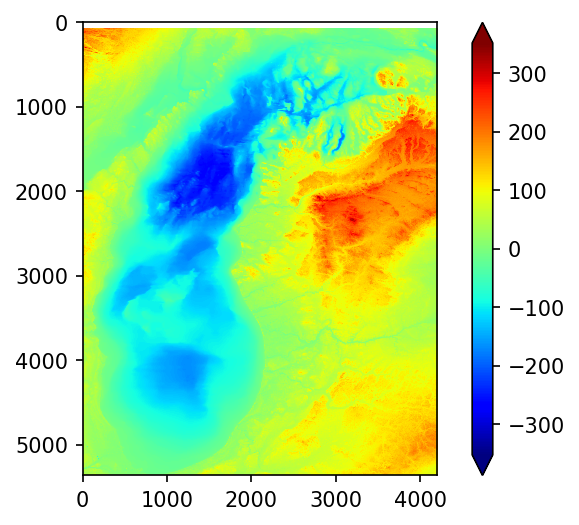

In [57]:
plt.imshow(michigan, cmap="jet")
plt.colorbar(extend = 'both')
plt.clim(-352, 352)

In [59]:
import matplotlib.colors as colors

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


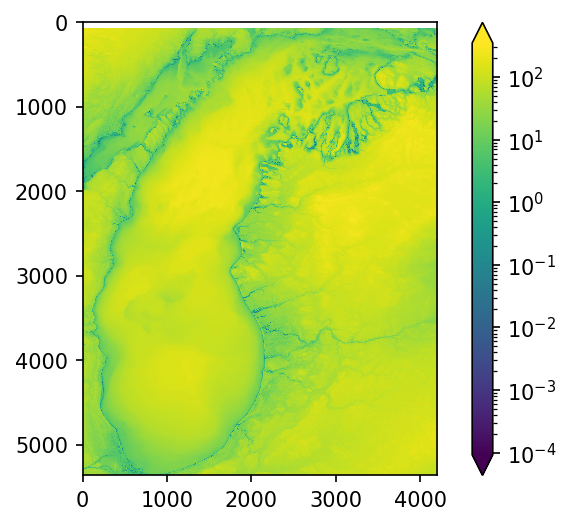

In [60]:
plt.imshow(np.abs(michigan), norm = colors.LogNorm())
plt.colorbar(extend='both')

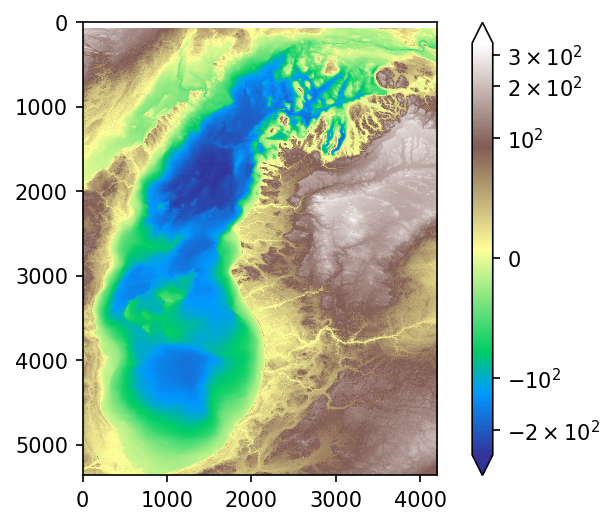

In [66]:
plt.imshow(michigan, norm = colors.SymLogNorm(100), cmap="terrain")
plt.colorbar(extend='both')

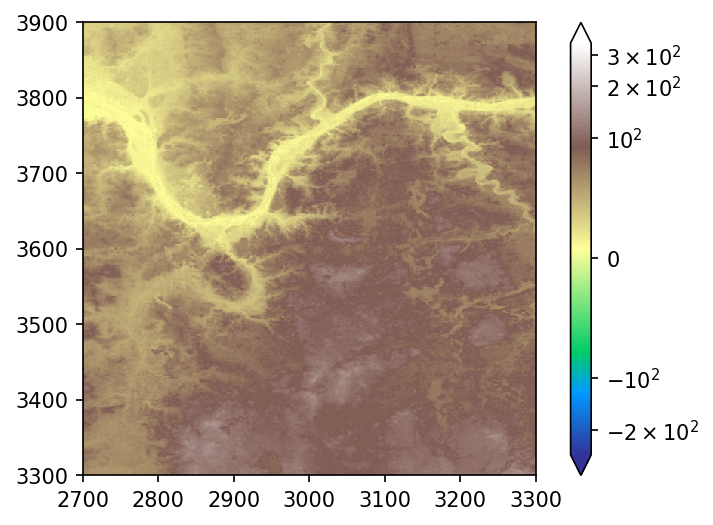

In [67]:
plt.imshow(michigan, norm = colors.SymLogNorm(100), cmap="terrain")
plt.xlim(2700, 3300)
plt.ylim(3300, 3900)
plt.colorbar(extend='both')

In [69]:
x0 = -88.0
y0 = 46.09
dx = 0.000833333333
dy = 0.000833333333


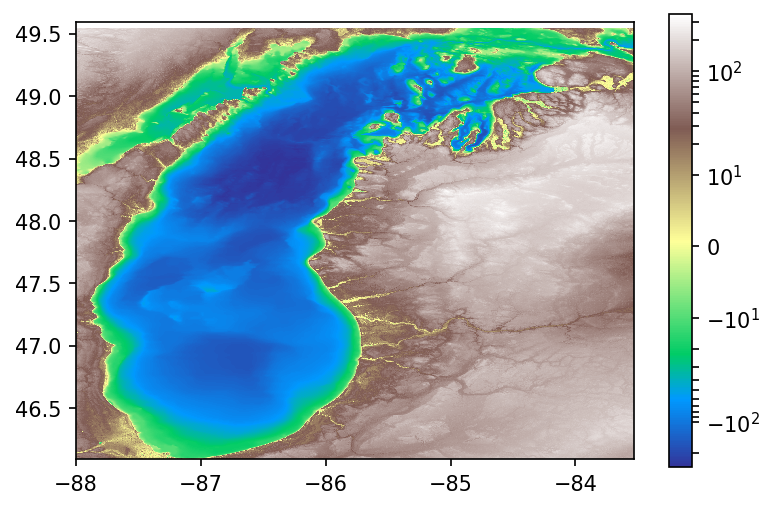

In [74]:
plt.imshow(michigan, extent = [x0, x0 + dx * michigan.shape[0],
                               y0, y0 + dy * michigan.shape[1]],
          norm = colors.SymLogNorm(10), cmap="terrain")
plt.colorbar()

In [71]:
y0, x0

(46.09, -88.0)